In [1]:
import pandas as pd
import sys
import os

from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/models")

In [3]:
from Classical_ML_Test import CML_Test
from format_data import Restructure
from signal_processing import normalize_data, add_WGN, add_rayleigh

In [4]:
RANDOM_STATE = 1234

# Read all undamaged bearing dataset 

In [5]:
healthy_name_list = ["K001", "K002", "K003", "K004", "K005", "K006"]
healthy_df_list = []
for k_name in healthy_name_list:
    for i in range(4):
        df = pd.read_csv("../data/processed/paderborn/down_sampled/" + k_name + "_K" + str(i) + "_down.csv", engine='c', low_memory=False, memory_map=True)
        del df["temp"]
        print("Start convert", k_name, "- K", i)
        healthy_df_list.append(df)
healthy_df = pd.concat(healthy_df_list, ignore_index=True)

Start convert K001 - K 0
Start convert K001 - K 1
Start convert K001 - K 2
Start convert K001 - K 3
Start convert K002 - K 0
Start convert K002 - K 1
Start convert K002 - K 2
Start convert K002 - K 3
Start convert K003 - K 0
Start convert K003 - K 1
Start convert K003 - K 2
Start convert K003 - K 3
Start convert K004 - K 0
Start convert K004 - K 1
Start convert K004 - K 2
Start convert K004 - K 3
Start convert K005 - K 0
Start convert K005 - K 1
Start convert K005 - K 2
Start convert K005 - K 3
Start convert K006 - K 0
Start convert K006 - K 1
Start convert K006 - K 2
Start convert K006 - K 3


# Read all inner ring damaged bearing

In [6]:
ir_name_list = ["KA01", "KA03", "KA05", "KA06", "KA07", "KA08", "KA09", "KA04", "KA15", "KA16", "KA22", "KA30"]
ir_df_list = []
for k_name in ir_name_list:
    for i in range(4):
        df = pd.read_csv("../data/processed/paderborn/down_sampled/" + k_name + "_K" + str(i) + "_down.csv", engine='c', low_memory=False, memory_map=True)
        del df["temp"]
        print("Start convert", k_name, "- K", i)
        ir_df_list.append(df)
ir_df = pd.concat(ir_df_list, ignore_index=True)

Start convert KA01 - K 0
Start convert KA01 - K 1
Start convert KA01 - K 2
Start convert KA01 - K 3
Start convert KA03 - K 0
Start convert KA03 - K 1
Start convert KA03 - K 2
Start convert KA03 - K 3
Start convert KA05 - K 0
Start convert KA05 - K 1
Start convert KA05 - K 2
Start convert KA05 - K 3
Start convert KA06 - K 0
Start convert KA06 - K 1
Start convert KA06 - K 2
Start convert KA06 - K 3
Start convert KA07 - K 0
Start convert KA07 - K 1
Start convert KA07 - K 2
Start convert KA07 - K 3
Start convert KA08 - K 0
Start convert KA08 - K 1
Start convert KA08 - K 2
Start convert KA08 - K 3
Start convert KA09 - K 0
Start convert KA09 - K 1
Start convert KA09 - K 2
Start convert KA09 - K 3
Start convert KA04 - K 0
Start convert KA04 - K 1
Start convert KA04 - K 2
Start convert KA04 - K 3
Start convert KA15 - K 0
Start convert KA15 - K 1
Start convert KA15 - K 2
Start convert KA15 - K 3
Start convert KA16 - K 0
Start convert KA16 - K 1
Start convert KA16 - K 2
Start convert KA16 - K 3


# Read all outer ring bearing data

In [7]:
or_name_list = ["KI01", "KI03", "KI04", "KI05", "KI07", "KI08", "KI14", "KI16", "KI17", "KI18", "KI21"]
# "KB23", "KB24", "KB27" are IR + OR
or_df_list = []
for k_name in or_name_list:
    for i in range(4):
        df = pd.read_csv("../data/processed/paderborn/down_sampled/" + k_name + "_K" + str(i) + "_down.csv", engine='c', low_memory=False, memory_map=True)
        del df["temp"]
        print("Start convert", k_name, "- K", i)
        or_df_list.append(df)
or_df = pd.concat(or_df_list, ignore_index=True)

Start convert KI01 - K 0
Start convert KI01 - K 1
Start convert KI01 - K 2
Start convert KI01 - K 3
Start convert KI03 - K 0
Start convert KI03 - K 1
Start convert KI03 - K 2
Start convert KI03 - K 3
Start convert KI04 - K 0
Start convert KI04 - K 1
Start convert KI04 - K 2
Start convert KI04 - K 3
Start convert KI05 - K 0
Start convert KI05 - K 1
Start convert KI05 - K 2
Start convert KI05 - K 3
Start convert KI07 - K 0
Start convert KI07 - K 1
Start convert KI07 - K 2
Start convert KI07 - K 3
Start convert KI08 - K 0
Start convert KI08 - K 1
Start convert KI08 - K 2
Start convert KI08 - K 3
Start convert KI14 - K 0
Start convert KI14 - K 1
Start convert KI14 - K 2
Start convert KI14 - K 3
Start convert KI16 - K 0
Start convert KI16 - K 1
Start convert KI16 - K 2
Start convert KI16 - K 3
Start convert KI17 - K 0
Start convert KI17 - K 1
Start convert KI17 - K 2
Start convert KI17 - K 3
Start convert KI18 - K 0
Start convert KI18 - K 1
Start convert KI18 - K 2
Start convert KI18 - K 3


# Windows all data

In [8]:
healthy_windows_df = Restructure(healthy_df).to_windows(50)
ir_windows_df = Restructure(ir_df).to_windows(50)
or_windows_df = Restructure(or_df).to_windows(50)

100%|██████████| 280000/280000 [00:00<00:00, 832006.26it/s]


# Label all data

In [9]:
healthy_windows_df["label"] = 1
ir_windows_df["label"] = 2
or_windows_df["label"] = 3

# Test Baseline

In [10]:
all_data = pd.concat([healthy_windows_df, ir_windows_df, or_windows_df])
X, y = all_data.loc[:, all_data.columns != 'label'], all_data[["label"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
clf = RandomForestClassifier(n_estimators=20, random_state=1234)
clf.fit(X_train, y_train.values.ravel())
y_predict = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9280502003682444


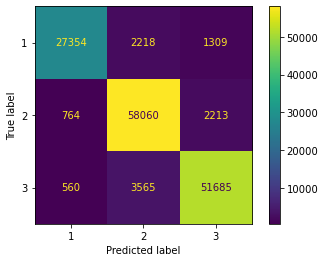

In [12]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# Add WGN

- Set different ratio

In [13]:
ratio_list = [-4, 0, 4, 8]

- Split data into train and test

In [14]:
healthy_train_df, healthy_test_df = train_test_split(healthy_df, test_size=0.2, random_state=RANDOM_STATE)
or_train_df, or_test_df = train_test_split(or_df, test_size=0.2, random_state=RANDOM_STATE)
ir_train_df, ir_test_df = train_test_split(ir_df, test_size=0.2, random_state=RANDOM_STATE)

- Normalize data

In [15]:
def norm_all(df: DataFrame) -> DataFrame:
    for col in df.columns:
        df[col] = normalize_data(df[col])
    return df

In [16]:
healthy_train_df = norm_all(healthy_train_df)
or_train_df = norm_all(or_train_df)
ir_train_df = norm_all(ir_train_df)
healthy_test_df = norm_all(healthy_test_df)
or_test_df = norm_all(or_test_df)
ir_test_df = norm_all(ir_test_df)

2969653131920
2969653131920
2967965711184
2967966096160
2969653131776
2967966096448
2967966095824


- Windows train and label it

In [17]:
healthy_train_df = Restructure(healthy_train_df).to_windows(50)
ir_train_df = Restructure(ir_train_df).to_windows(50)
or_train_df = Restructure(or_train_df).to_windows(50)

healthy_train_df["label"] = 1
ir_train_df["label"] = 2
or_train_df["label"] = 3

train_data = pd.concat([healthy_train_df, ir_train_df, or_train_df])

100%|██████████| 224000/224000 [00:00<00:00, 544687.33it/s]


- Add noise to test, add labels and to windows

In [18]:
from copy import deepcopy


def wgn_all(df: DataFrame, snr: int):
    temp_df = deepcopy(df)
    for col in temp_df.columns:
        temp_df[col] = add_WGN(temp_df[col], snr)
    return temp_df

In [19]:
test_dict = dict()
for ratio in ratio_list:
    temp_healthy = Restructure(wgn_all(healthy_test_df, ratio)).to_windows(50)
    temp_ir = Restructure(wgn_all(ir_test_df, ratio)).to_windows(50)
    temp_or = Restructure(wgn_all(or_test_df, ratio)).to_windows(50)

    temp_healthy["label"] = 1
    temp_ir["label"] = 2
    temp_or["label"] = 3

    test_dict[ratio] = pd.concat([temp_healthy, temp_ir, temp_or])

100%|██████████| 56000/56000 [00:00<00:00, 823444.74it/s]


- Method that test on each SNR

In [20]:
def random_forest_on_wgn(test_set: DataFrame, model: RandomForestClassifier):
    X_test = test_set.loc[:, test_set.columns != "label"]
    y_test = test_set[["label"]]
    y_predict = model.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_predict))
    metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

SNR: -4
Accuracy: 0.36322836564496913
SNR: 0
Accuracy: 0.37707814361529296
SNR: 4
Accuracy: 0.39404852160727827
SNR: 8
Accuracy: 0.40262509476876424


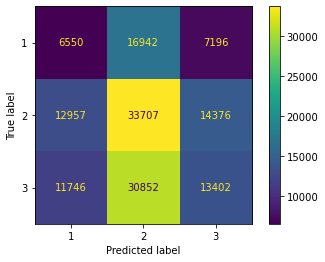

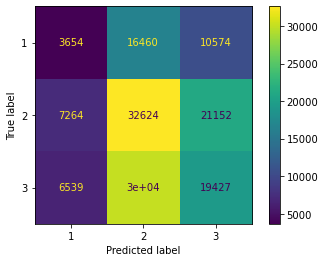

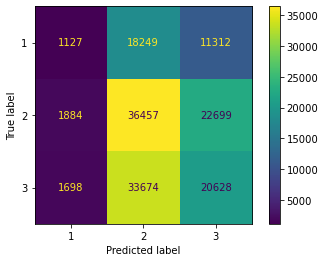

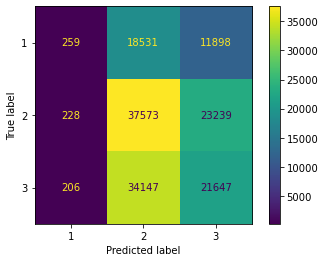

In [21]:
model = RandomForestClassifier(n_estimators=20, random_state=RANDOM_STATE)
X_train = train_data.loc[:, train_data.columns != "label"]
y_train = train_data[["label"]]
model.fit(X_train, y_train.values.ravel())
for snr, test_df in test_dict.items():
    print("SNR:", snr)
    random_forest_on_wgn(test_df, model)